In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/My Drive/ML Project data/weather.csv")


# **Data Preprocessing**

In [ ]:
data['MinTemp'].fillna(data['MinTemp'].mean(), inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].mean(), inplace=True)
data['Rainfall'].fillna(data['Rainfall'].mean(), inplace=True)
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean(), inplace=True)
data['RainTomorrow'].fillna(0, inplace=True)
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


# **Visualizing Data**

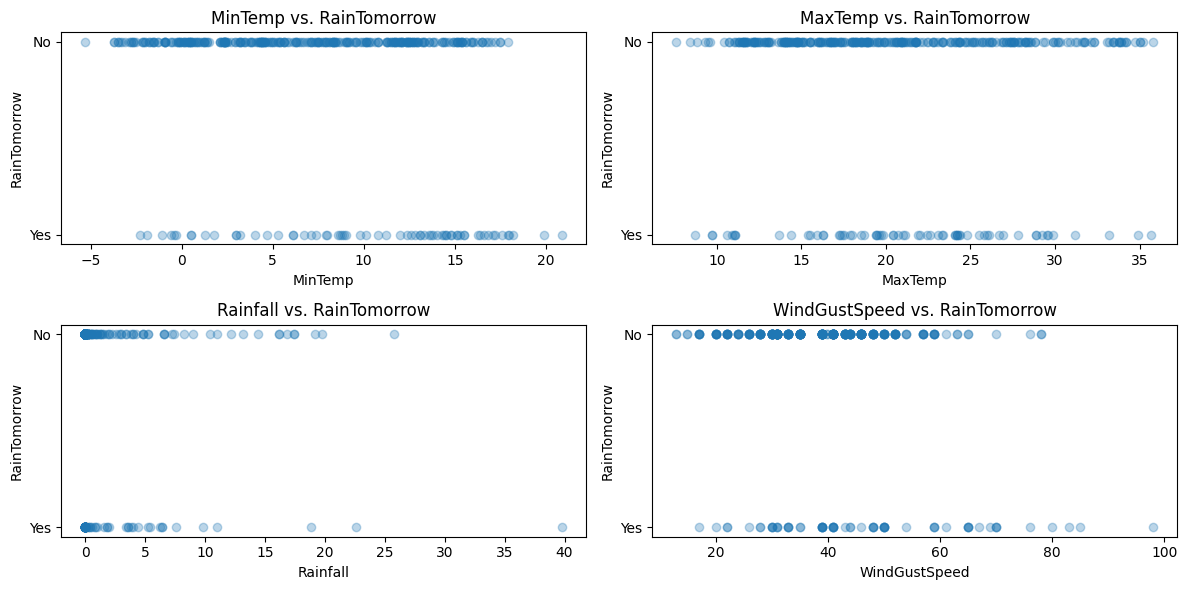

In [ ]:
plt.figure(figsize=(12, 6))

# MinTemp vs. RainTomorrow
plt.subplot(2, 2, 1)
plt.scatter(data['MinTemp'], data['RainTomorrow'], marker='o', alpha=0.3)
plt.xlabel('MinTemp')
plt.ylabel('RainTomorrow')
plt.title('MinTemp vs. RainTomorrow')

# MaxTemp vs. RainTomorrow
plt.subplot(2, 2, 2)
plt.scatter(data['MaxTemp'], data['RainTomorrow'], marker='o', alpha=0.3)
plt.xlabel('MaxTemp')
plt.ylabel('RainTomorrow')
plt.title('MaxTemp vs. RainTomorrow')

# Rainfall vs. RainTomorrow
plt.subplot(2, 2, 3)
plt.scatter(data['Rainfall'], data['RainTomorrow'], marker='o', alpha=0.3)
plt.xlabel('Rainfall')
plt.ylabel('RainTomorrow')
plt.title('Rainfall vs. RainTomorrow')

# WindGustSpeed vs. RainTomorrow
plt.subplot(2, 2, 4)
plt.scatter(data['WindGustSpeed'], data['RainTomorrow'], marker='o', alpha=0.3)
plt.xlabel('WindGustSpeed')
plt.ylabel('RainTomorrow')
plt.title('WindGustSpeed vs. RainTomorrow')

plt.tight_layout()
plt.show()

# **Attribute Selection**

In [ ]:
X = data[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed']]
y = data['RainTomorrow']

# **Train test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Initialize Model**

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# **Prediction on Test Data**

In [ ]:
y_pred = model.predict(X_test)

# **Evaluating Performance**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)

print("Classification Report:\n", report)

Accuracy: 0.7972972972972973
Classification Report:
               precision    recall  f1-score   support

          No       0.79      1.00      0.89        58
         Yes       1.00      0.06      0.12        16

    accuracy                           0.80        74
   macro avg       0.90      0.53      0.50        74
weighted avg       0.84      0.80      0.72        74



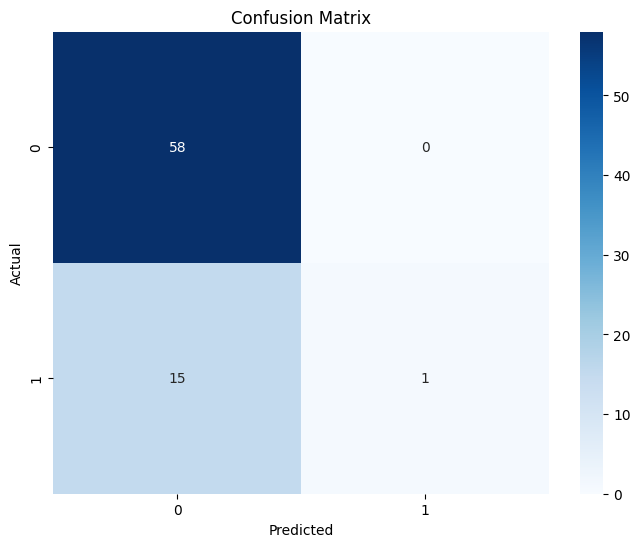

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **Predicting Rainfall**

In [ ]:
new_data = pd.DataFrame({'MinTemp': [14.0], 'MaxTemp': [19.0], 'Rainfall': [40.0], 'WindGustSpeed': [89.0]})

new_data = scaler.transform(new_data)  # Standardize new data using the same scaler

predicted_rain = model.predict(new_data)

print("Predicted Rain Tomorrow:", "Yes" if predicted_rain[0] == 'Yes' else "No")

Predicted Rain Tomorrow: Yes
